Task:- 1

/var/folders/s2/d19sdc_12x31xfg92510w2ch0000gn/T/ipykernel_4540/161255784.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)


📊 Linear Regression Performance:
MSE: 1.2724750355324204
R² Score: 0.44094283667874745

🌳 Decision Tree Regressor Performance:
MSE: 0.056059654631083186
R² Score: 0.9753703997173436


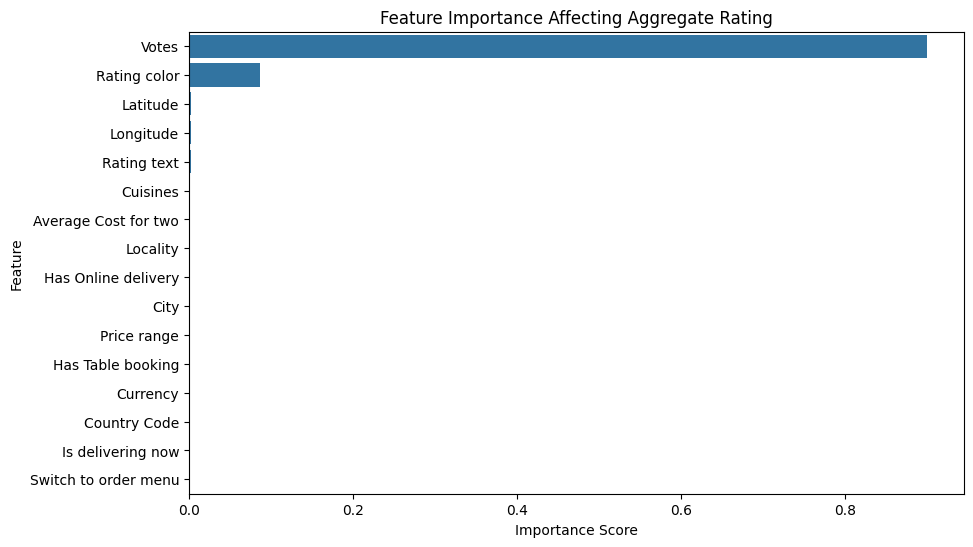


🔍 Top Influential Features:
Votes                   0.899607
Rating color            0.086808
Latitude                0.002854
Longitude               0.002646
Rating text             0.002580
Cuisines                0.001764
Average Cost for two    0.001627
Locality                0.001266
Has Online delivery     0.000382
City                    0.000195
dtype: float64


In [1]:
 # 1️⃣ Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load dataset
df = pd.read_csv("Dataset .csv")

# 3️⃣ Handle missing values
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

# 4️⃣ Drop unnecessary columns (identifiers, verbose text)
df.drop(['Restaurant ID', 'Restaurant Name', 'Address', 'Locality Verbose'], axis=1, inplace=True)

# 5️⃣ Encode categorical columns
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])

# 6️⃣ Define features and target
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

# 7️⃣ Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8️⃣ Train two models for comparison
# (a) Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)

# (b) Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# 9️⃣ Evaluate both models
print("📊 Linear Regression Performance:")
print("MSE:", mean_squared_error(y_test, lin_pred))
print("R² Score:", r2_score(y_test, lin_pred))

print("\n🌳 Decision Tree Regressor Performance:")
print("MSE:", mean_squared_error(y_test, tree_pred))
print("R² Score:", r2_score(y_test, tree_pred))

# 🔟 Feature Importance (for Decision Tree)
importances = pd.Series(tree_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance Affecting Aggregate Rating")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# 11️⃣ Interpretation
print("\n🔍 Top Influential Features:")
print(importances.head(10))